# Exploratory Data Analysis

Part of a course on Data Analysis with Python offered by IBM through CognitiveClass. This is module 3 of the course with objectives to:
- Explore features or characteristics of a dataset (automobile dataset) to predict a single feature or variable in this case the `price` feature.

In [1]:
# Import libraries
import pandas as pd
import numpy as np

In [2]:
# Read the dataset
df = pd.read_csv('automobileEDA.csv', header=0)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


## Analyzing Individual Feature Patterns Using Visualization

In [3]:
# Import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

When visualizing variables, it is important to know what type of variable we are dealing with. This will help us to choose the correct visualization method.

In [4]:
# List the data types of each column
df.dtypes

symboling              int64
normalized-losses      int64
make                  object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
city-L/100km         float64
horsepower-binned     object
diesel                 int64
gas                    int64
dtype: object

In [5]:
# Let's try to calculate the correlation between variables
df.corr(numeric_only=True)

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.008245,-0.182196,0.075819,0.279740,-0.035527,0.036233,-0.082391,0.066171,-0.196735,0.196735
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055563,-0.114713,0.217299,0.239543,-0.225016,-0.181877,0.133999,0.238567,-0.101546,0.101546
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158502,0.250313,0.371147,-0.360305,-0.470606,-0.543304,0.584642,0.476153,0.307237,-0.307237
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.124139,0.159733,0.579821,-0.285970,-0.665192,-0.698142,0.690628,0.657373,0.211187,-0.211187
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188829,0.189867,0.615077,-0.245800,-0.633531,-0.680635,0.751265,0.673363,0.244356,-0.244356
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.062704,0.259737,-0.087027,-0.309974,-0.049800,-0.104812,0.135486,0.003811,0.281578,-0.281578
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167562,0.156433,0.757976,-0.279361,-0.749543,-0.794889,0.834415,0.785353,0.221046,-0.221046
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.209523,0.028889,0.822676,-0.256733,-0.650546,-0.679571,0.872335,0.745059,0.070779,-0.070779
bore,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,0.001263,0.566936,-0.267392,-0.582027,-0.591309,0.543155,0.554610,0.054458,-0.054458
stroke,-0.008245,0.055563,0.158502,0.124139,0.188829,-0.062704,0.167562,0.209523,-0.055390,1.000000,0.187923,0.098462,-0.065713,-0.034696,-0.035201,0.082310,0.037300,0.241303,-0.241303


### Continuous Numerical Variables
Continuous numerical variables are variables that may contain any value within some range. They can be type `int64` of `float64`. A great way to visualize these variables is by using **scatterplots** with **fitted lines**.

(0.0, 53792.40403892138)

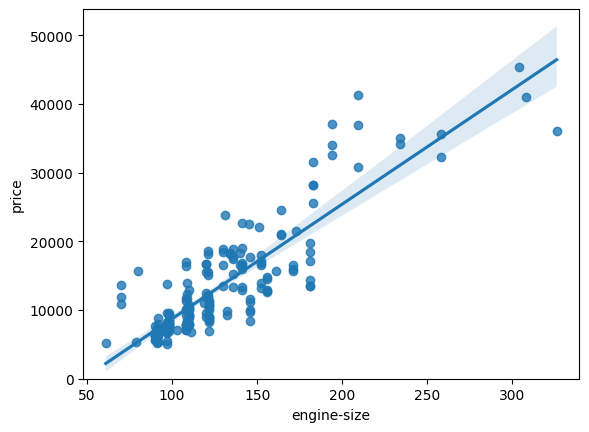

In [6]:
# Scatterplot of 'engine-size' and 'price'
sns.regplot(x='engine-size', y='price', data=df)
plt.ylim(0,)

As the `engine-size` increase, the `price` increase as well. This is what we call a positive correlation. The `engine-size` seems like a good predictor for `price` since the regression line is almost a perfect diagonal line (not too steep and not too flat). We can calculate the correlation between these variables and see that it's approximately $0.87$.

In [7]:
df[['engine-size', 'price']].corr()

,engine-size,price
engine-size,1.000000,0.872335
price,0.872335,1.000000


<Axes: xlabel='highway-mpg', ylabel='price'>

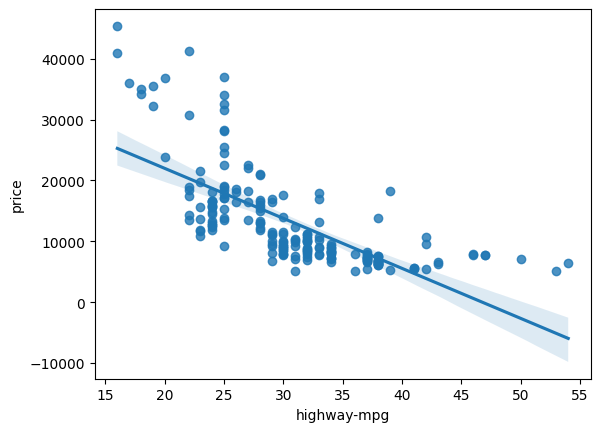

In [8]:
# Let's see another potential predictor, 'highway-mpg'
sns.regplot(x='highway-mpg', y='price', data=df)

The graph indicates a negative correlation between these two variables with pretty good correlation value of approximately $-0.705$.

In [9]:
df[['highway-mpg', 'price']].corr()

,highway-mpg,price
highway-mpg,1.000000,-0.704692
price,-0.704692,1.000000


Now, let's see another example with a weak linear relationship using `peak-rpm` as a preidctor variable.

<Axes: xlabel='peak-rpm', ylabel='price'>

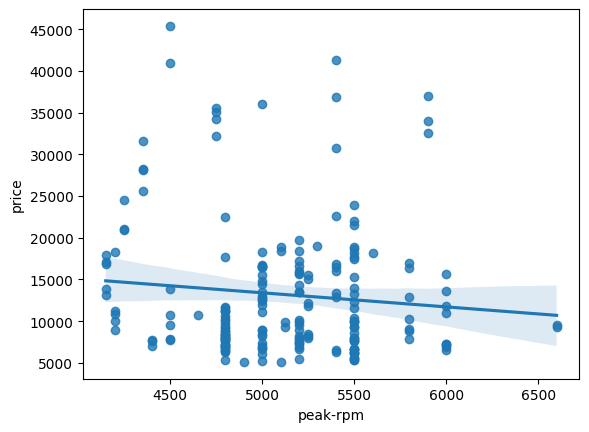

In [10]:
sns.regplot(x='peak-rpm', y='price', data=df)

We can see the regression line is too flat and the data points are too scattered far from the line. Therefore, the `peak-rpm` can't be a reliable predictor variable for `price`. In addition, we can see the correlation value which is very low at approximately $-0.102$.

In [11]:
df[['peak-rpm', 'price']].corr()

,peak-rpm,price
peak-rpm,1.000000,-0.101616
price,-0.101616,1.000000


### Categorical Variables
These are variables that describe a 'characteristic' of a data unit, and are selected from a small group of categories. The categorical variables can have the type `object` or `int64`. A good way to visualize categorical variables is by using **boxplot**.

<Axes: xlabel='body-style', ylabel='price'>

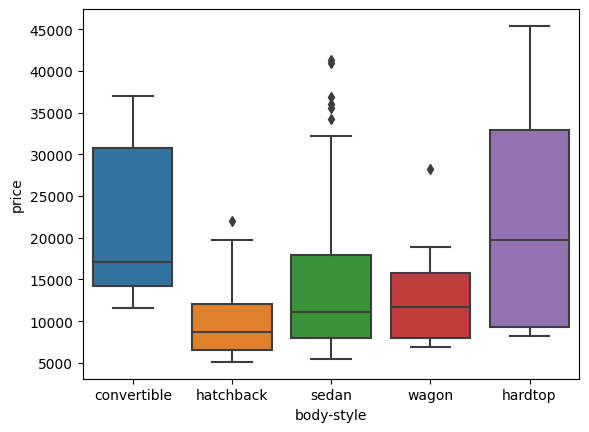

In [12]:
# Let's look at the variables 'body-style' and 'price'
sns.boxplot(x='body-style', y='price', data=df)

We observed that the distributions of `price` between the different `body-style` categories have a **significant overlap**, hence `body-style` would not be a good predictor of price. Let's examine `engine-location` and `price`.

<Axes: xlabel='engine-location', ylabel='price'>

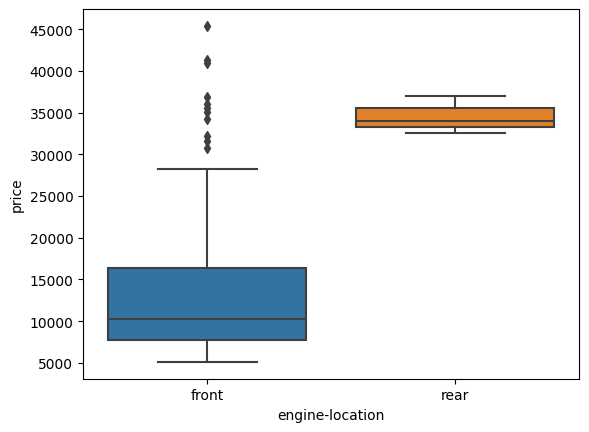

In [13]:
sns.boxplot(x='engine-location', y='price', data=df)

Here we observed that the distribution of `price` between two `engine-location` categories are **distinct** enough to take `engine-location` as a potential good predictor of `price`.

<Axes: xlabel='drive-wheels', ylabel='price'>

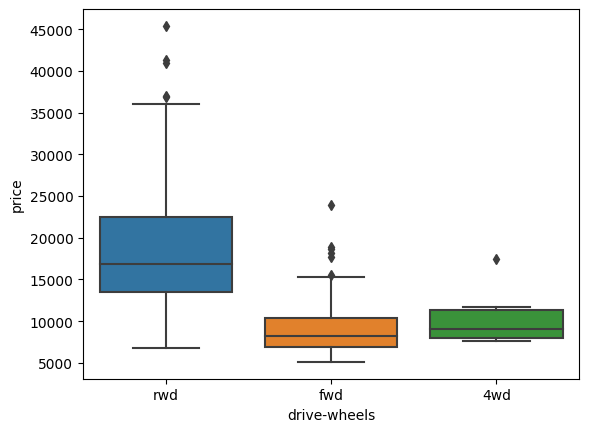

In [14]:
# Let's try 'drive-wheels'
sns.boxplot(x='drive-wheels', y='price', data=df)

Here we observed the distribution of `price` is somewhat differs. While it is not as distinct as `engine-location` above, it is still could potentially be a good predictor.

## Descriptive Statistical Analysis
Let's first take a look at the variables by utilizing a description method.

The **describe** function automatically computes basic statistics for all continuous variables. Any NaN values are automatically skipped in these statistics.

In [15]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,197.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,0.837102,0.915126,53.766667,2555.666667,126.875622,3.330692,3.256904,10.164279,103.405534,5117.665368,25.179104,30.686567,13207.129353,9.944145,0.099502,0.900498
std,1.254802,31.99625,6.066366,0.059213,0.029187,2.447822,517.296727,41.546834,0.268072,0.319256,4.004965,37.365700,478.113805,6.423220,6.815150,7947.066342,2.534599,0.300083,0.300083
min,-2.000000,65.00000,86.600000,0.678039,0.837500,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,4.795918,0.000000,0.000000
25%,0.000000,101.00000,94.500000,0.801538,0.890278,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000,7.833333,0.000000,1.000000
50%,1.000000,122.00000,97.000000,0.832292,0.909722,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5125.369458,24.000000,30.000000,10295.000000,9.791667,0.000000,1.000000
75%,2.000000,137.00000,102.400000,0.881788,0.925000,55.500000,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,12.368421,0.000000,1.000000
max,3.000000,256.00000,120.900000,1.000000,1.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000,18.076923,1.000000,1.000000


In [16]:
# Including the 'object' type variables
df.describe(include=['object'])

,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,horsepower-binned
count,201,201,201,201,201,201,201,201,201,200
unique,22,2,2,5,3,2,6,7,8,3
top,toyota,std,four,sedan,fwd,front,ohc,four,mpfi,Low
freq,32,165,115,94,118,198,145,157,92,115


### Value Counts
Value counts is a good way to understand how many units of each characteristic/variable we have. We can apply the `value_counts` method on the column `drive-wheels`.

**Don't forget** the method `value_counts` only works on pandas series, not pandas dataframe. Hence, we only include one bracket `df['drive-wheels']`, not two brackets `df[['drive-wheels']]`.

In [17]:
df['drive-wheels'].value_counts()

drive-wheels
fwd    118
rwd     75
4wd      8
Name: count, dtype: int64

We can convert the series to dataframe using `to_frame()` method. Here, we repeat the step above and save the results to a new dataframe `drive_wheels_counts`. 

In [18]:
drive_wheels_counts = df['drive-wheels'].value_counts().to_frame()
drive_wheels_counts

,count
drive-wheels,
fwd,118
rwd,75
4wd,8


In [19]:
# 'engine-location' as variable
engine_loc_counts = df['engine-location'].value_counts().to_frame()
engine_loc_counts

,count
engine-location,
front,198
rear,3


After examining the value counts of the `engine-location`, we observed that engine location would not be a good predictor for `price`. This is due to the skewed result with only three cars have a rear engine and 198 cars have a front engine.

## Basics of Grouping
The `groupby` method groups data by different categories. The data is grouped based on one or several variables, and analysis is performed on the individual group.

For example, let's group by the variable `drive-wheels`. We see that there are three different categories of drive wheels.

In [20]:
df['drive-wheels'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

If we want to know, on average, which type of drive wheel is most valuable, we can group `drive-wheels` and the average them.

We can select the columns `drive-wheels` and `price`, then assign it to the variable  `df_group_one`.

In [21]:
df_group_one = df[['drive-wheels', 'price']]

In [22]:
# Calculate the average price for each categories
df_group_one = df_group_one.groupby(['drive-wheels'],
                                   as_index=False).mean()
df_group_one

,drive-wheels,price
0,4wd,10241.000000
1,fwd,9244.779661
2,rwd,19757.613333


From the results, it seems rear-wheel drive vehicles are, on average, the most expensive. While the 4-wheel and front-wheel are approximately have the same price.

We can also group by multiple variables.

In [23]:
# grouping with multiple variables
df_groups = df[['drive-wheels','body-style','price']]
df_groups = df_groups.groupby(['drive-wheels', 'body-style'],
                             as_index=False).mean()
df_groups

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


This grouped data will be easier to visualize if it is made into a pivot table.

In [24]:
grouped_pivot = df_groups.pivot(index='drive-wheels',
                               columns='body-style')
grouped_pivot

price                                             
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333  \
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

In [25]:
# Fill the missing value with zero
grouped_pivot = grouped_pivot.fillna(0)
grouped_pivot

price                                             
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  0.0      0.000000   7603.000000  12647.333333  \
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

In [26]:
# Another example using only 'body-style'
df_group_two = df[['body-style', 'price']]
df_group_two = df_group_two.groupby(['body-style'],
                                   as_index=False).mean()
df_group_two

,body-style,price
0,convertible,21890.500000
1,hardtop,22208.500000
2,hatchback,9957.441176
3,sedan,14459.755319
4,wagon,12371.960000


Now, lets use a heat map to visualize the relationship between `drive-wheels`, `body-style`, and `price`.

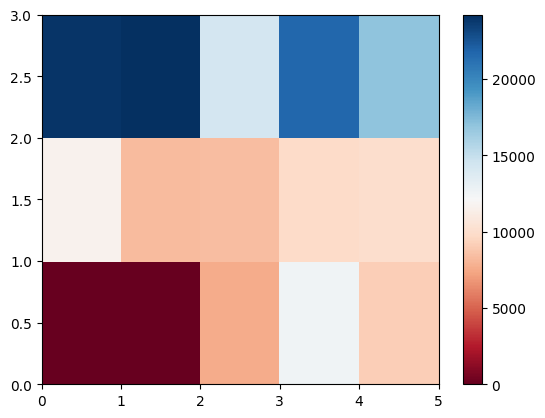

In [27]:
plt.pcolor(grouped_pivot, cmap='RdBu')
plt.colorbar()
plt.show()

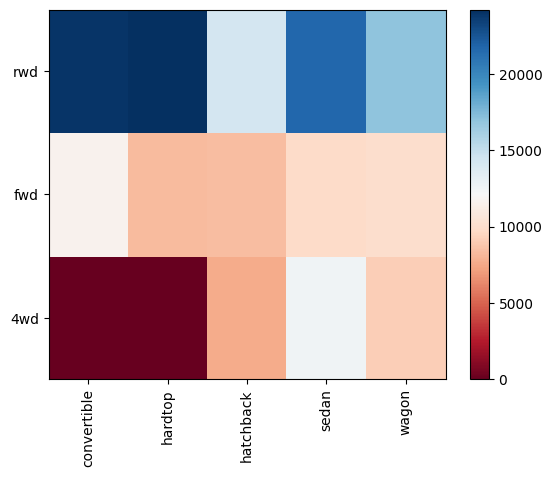

In [28]:
# Fix the labels
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='RdBu')

# Label names
row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

# Move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

# Insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

# Rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

## Correlation and Causation

**Correlation** is a measure of the extent of interdependence between variables.
**Causation** is the relationship between cause and effect between two variables.

It is important to know the difference between these two. Correlation does not imply causation. Determining correlation is much simpler than determining causation as causation may require independent experimentation.

**Pearson Correlation**
The Pearson Correlation measures the linear dependence between two variables X and Y.

The resulting coefficient is a value between -1 and 1 inclusive, where:
- **1** means perfect **Positive** linear correlation,
- **0** means **No** linear correlation, and
- **-1** means perfect **Negative** linear correlation.

Pearson Correlation is the default method of the function `corr()`. Like before, we can calculate the Pearson Correlation of the numeric variables.

In [29]:
df.corr(numeric_only=True)

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.008245,-0.182196,0.075819,0.279740,-0.035527,0.036233,-0.082391,0.066171,-0.196735,0.196735
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055563,-0.114713,0.217299,0.239543,-0.225016,-0.181877,0.133999,0.238567,-0.101546,0.101546
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158502,0.250313,0.371147,-0.360305,-0.470606,-0.543304,0.584642,0.476153,0.307237,-0.307237
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.124139,0.159733,0.579821,-0.285970,-0.665192,-0.698142,0.690628,0.657373,0.211187,-0.211187
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188829,0.189867,0.615077,-0.245800,-0.633531,-0.680635,0.751265,0.673363,0.244356,-0.244356
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.062704,0.259737,-0.087027,-0.309974,-0.049800,-0.104812,0.135486,0.003811,0.281578,-0.281578
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167562,0.156433,0.757976,-0.279361,-0.749543,-0.794889,0.834415,0.785353,0.221046,-0.221046
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.209523,0.028889,0.822676,-0.256733,-0.650546,-0.679571,0.872335,0.745059,0.070779,-0.070779
bore,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,0.001263,0.566936,-0.267392,-0.582027,-0.591309,0.543155,0.554610,0.054458,-0.054458
stroke,-0.008245,0.055563,0.158502,0.124139,0.188829,-0.062704,0.167562,0.209523,-0.055390,1.000000,0.187923,0.098462,-0.065713,-0.034696,-0.035201,0.082310,0.037300,0.241303,-0.241303


Sometimes we would like to know the significant of the correlation estimate.

**P-value**

What is this P-value? The P-value is the probability value that the correlation between these two variables is statistically significant. Normaly, we choose a significance level of $0.05$, which means that we are $95\%$ confident that the correlation between the variables is significant.

By convention, when the
- p-value is $<0.001$, there is a **strong** evidence that the correlation is significant.
- p-value is $<0.05$, there is a **moderate** evidence that the correlation is significant.
- p-value is $<0.1$, there is a **weak** evidence that the correlation is significant.
- p-value is $>0.1$, there is **no** evidence that the correlation is significant.

We can obtain this information using `stats` module in the `scipy` library.

In [30]:
from scipy import stats

### Wheel-Base vs Price
Let's calculate the Pearson Correlation Coefficient and P-value of `wheel-base` and `price`.

In [31]:
coef, p = stats.pearsonr(df['wheel-base'], df['price'])
print(f'The Pearson Correlation Coefficient is {coef} with P-value of {p}')

The Pearson Correlation Coefficient is 0.584641822265508 with P-value of 8.076488270732947e-20


Since the p-value is $<0.001$, the correlation between `wheel-base` and `price` is statistically significant, although the linear relationship isn't strong at approximately $0.585$.

### Horsepower vs Price

In [32]:
coef, p = stats.pearsonr(df['horsepower'], df['price'])
print(f'The Pearson Correlation Coefficient is {coef} with P-value of {p}')

The Pearson Correlation Coefficient is 0.8095745670036562 with P-value of 6.369057428259526e-48


`horsepower` has a strong linear relationship with `price`and has a strong evidence that the correlation is significant.

### Length vs Price

In [33]:
coef, p = stats.pearsonr(df['length'], df['price'])
print(f'The Pearson Correlation Coefficient is {coef} with P-value of {p}')

The Pearson Correlation Coefficient is 0.6906283804483639 with P-value of 8.016477466159153e-30


`length` has a moderately strong linear relationship with `price` and has a strong evidence that the correlation is significant.

### Width vs Price

In [34]:
coef, p = stats.pearsonr(df['width'], df['price'])
print(f'The Pearson Correlation Coefficient is {coef} with P-value of {p}')

The Pearson Correlation Coefficient is 0.7512653440522672 with P-value of 9.200335510482065e-38


`width` has a quite strong linear relationship with `price` and has a strong evidence that the correlation is significant.

### Curb-Weight vs Price

In [35]:
coef, p = stats.pearsonr(df['curb-weight'], df['price'])
print(f'The Pearson Correlation Coefficient is {coef} with P-value of {p}')

The Pearson Correlation Coefficient is 0.8344145257702843 with P-value of 2.189577238893972e-53


strong linear relationship with a strong significance

### Engine-size vs Price

In [36]:
coef, p = stats.pearsonr(df['engine-size'], df['price'])
print(f'The Pearson Correlation Coefficient is {coef} with P-value of {p}')

The Pearson Correlation Coefficient is 0.8723351674455181 with P-value of 9.265491622201997e-64


strong linear relationship with a strong significance

### Bore vs Price

In [37]:
coef, p = stats.pearsonr(df['bore'], df['price'])
print(f'The Pearson Correlation Coefficient is {coef} with P-value of {p}')

The Pearson Correlation Coefficient is 0.5431553832626603 with P-value of 8.04918948393533e-17


moderate linear relationship with a strong significance

### City-mpg vs Price

In [38]:
coef, p = stats.pearsonr(df['city-mpg'], df['price'])
print(f'The Pearson Correlation Coefficient is {coef} with P-value of {p}')

The Pearson Correlation Coefficient is -0.6865710067844678 with P-value of 2.321132065567512e-29


moderate negative linear relationship with a strong significance

### Highway-mpg vs Price

In [39]:
coef, p = stats.pearsonr(df['highway-mpg'], df['price'])
print(f'The Pearson Correlation Coefficient is {coef} with P-value of {p}')

The Pearson Correlation Coefficient is -0.704692265058953 with P-value of 1.7495471144475452e-31


quite strong negative linear relationship with a strong significance

## ANOVA

ANOVA: Analysis of Variance
The Analysis of Variance is a statistical method used to test whether there are significant differences between the means of two or more groups. ANOVA returns two parameters:
- **F-test score**: ANOVA assumes the means of all groups are the same, calculates how much the actual means deviate from the assumption, and reports it as the F-test score. A larger score means there is a larger difference between the means.
- **P-value**: P-value tells how statistically significant our calculated score value is.

If the `price` variable is strongly correlated with the variable we are analyzing, we expect ANOVA to return a sizeable F-test score and a small p-value.

### Drive Wheels
Since ANOVA analyzes the difference between different groups of the same variable, the `groupby` function will come in handy. Because the ANOVA algorithm averages the data automatically, we do not need to take the average before hand.

In [40]:
g_test2 = df_groups[['drive-wheels', 'price']].groupby(['drive-wheels'])
g_test2.head(2)

,drive-wheels,price
0,4wd,7603.000000
1,4wd,12647.333333
3,fwd,11595.000000
4,fwd,8249.000000
8,rwd,23949.600000
9,rwd,24202.714286


In [42]:
df_groups

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


In [43]:
# Values of the method group
g_test2.get_group('4wd')['price']

0     7603.000000
1    12647.333333
2     9095.750000
Name: price, dtype: float64

In [44]:
# ANOVA
f, p_val = stats.f_oneway(g_test2.get_group('fwd')['price'],
                          g_test2.get_group('rwd')['price'],
                          g_test2.get_group('4wd')['price'])
print(f"ANOVA results: F = {f}, p = {p_val}")

ANOVA results: F = 17.54495590883977, p = 0.000536541192542127


This is a great result with a large F-test score showing a strong correlation and a P-value of almost 0 implying almost certain statistical significance. But does this mean all three tested groups are all this highly correlated?

Let's examine them separately.

In [45]:
# fwd and rwd
f, p_val = stats.f_oneway(g_test2.get_group('fwd')['price'],
                          g_test2.get_group('rwd')['price'])
print(f"ANOVA results: F = {f}, p = {p_val}")

ANOVA results: F = 26.75473847377244, p = 0.0008505298615827272


In [46]:
# 4wd and rwd
f, p_val = stats.f_oneway(g_test2.get_group('rwd')['price'],
                          g_test2.get_group('4wd')['price'])
print(f"ANOVA results: F = {f}, p = {p_val}")

ANOVA results: F = 13.603994177561603, p = 0.010228629764546682


In [47]:
# 4wd and fwd
f, p_val = stats.f_oneway(g_test2.get_group('fwd')['price'],
                          g_test2.get_group('4wd')['price'])
print(f"ANOVA results: F = {f}, p = {p_val}")

ANOVA results: F = 0.015958539708919313, p = 0.9035999352040226


## Conclusion: Important Variables
We now have a better idea of what our data looks like and which variables are important to take into account when predicting the car price. We have narrowed it down to the following variables:

Continuous numerical variables:

- Length
- Width
- Curb-weight
- Engine-size
- Horsepower
- City-mpg
- Highway-mpg
- Wheel-base
- Bore

Categorical variables:

- Drive-wheels

As we now move into building machine learning models to automate our analysis, feeding the model with variables that meaningfully affect our target variable will improve our model's prediction performance.
